# Exploration of lego sets and color over the years

In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np

# Lego colors dataset

In [2]:
colors_df = pd.read_csv('RawData/colors.csv')
colors_df_backup = colors_df.to_csv()
colors_df

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f
...,...,...,...,...
130,1004,Trans Flame Yellowish Orange,FCB76D,t
131,1005,Trans Fire Yellow,FBE890,t
132,1006,Trans Light Royal Blue,B4D4F7,t
133,1007,Reddish Lilac,8E5597,f


## Cleaning / Wrangling

**Seems that the ID starts at the wrong number (-1), moving the index so it starts at 0 for more readability**

In [3]:
colors_df['id'] = colors_df['id'].shift(-1)

In [4]:
colors_df.loc[134,'id'] = 10000

In [5]:
colors_df['id'] = colors_df['id'].astype('int')
colors_df

,id,name,rgb,is_trans
0,0,Unknown,0033B2,f
1,1,Black,05131D,f
2,2,Blue,0055BF,f
3,3,Green,237841,f
4,4,Dark Turquoise,008F9B,f
...,...,...,...,...
130,1005,Trans Flame Yellowish Orange,FCB76D,t
131,1006,Trans Fire Yellow,FBE890,t
132,1007,Trans Light Royal Blue,B4D4F7,t
133,9999,Reddish Lilac,8E5597,f


**Turning the "is transparent" column into boolean**

In [6]:
values_map = {'t': True, 'f': False}
colors_df['is_trans'] = colors_df['is_trans'].replace(values_map)

**Checking we don't have null values**

In [7]:
colors_df.isnull().value_counts()

id     name   rgb    is_trans
False  False  False  False       135
Name: count, dtype: int64

## Insights on the data

In [8]:
#Checking that all the colors in our dataset are unique
colors_df['name'].nunique()

135

In [9]:
colors_df['is_trans'].value_counts()

is_trans
False    107
True      28
Name: count, dtype: int64

In [10]:
transparent_percentage =  ((colors_df['is_trans'] == True).sum() / (colors_df['is_trans'] == False).sum())*100

In [11]:
transparent_percentage

26.168224299065418

# Lego sets dataset 

In [12]:
sets_df = pd.read_csv('RawData/sets.csv')
sets_df_backup = sets_df.to_csv()
sets_df

,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12
...,...,...,...,...,...
11861,Wauwatosa-1,"LEGO Store Grand Opening Exclusive Set, Mayfai...",2012,408,15
11862,WHITEHOUSE-1,Micro White House,2015,598,59
11863,Wiesbaden-1,"LEGO Store Grand Opening Exclusive Set, Wiesba...",2010,408,146
11864,WishingWell-1,Wishing Well [Toys R Us Promo],2013,494,28


In [13]:
sets_df.isnull().value_counts()

set_num  name   year   theme_id  num_parts
False    False  False  False     False        11866
Name: count, dtype: int64

In [14]:
sets_df.dtypes

set_num      object
name         object
year          int64
theme_id      int64
num_parts     int64
dtype: object

## Insights on the data

### Parts number exploration

In [15]:
sets_df_sorted_years = sets_df.sort_values('year')
sets_df_sorted_years

,set_num,name,year,theme_id,num_parts
7065,700.1.2-1,Individual 2 x 2 Bricks,1950,371,9
7081,700.A-1,Automatic Binding Bricks Small Brick Set (Lego...,1950,366,24
7083,700.B.1-1,Individual 1 x 4 x 2 Window (without glass),1950,371,7
7084,700.B.2-1,Individual 1 x 2 x 3 Window (without glass),1950,371,7
7085,700.B.3-1,Individual 1 x 2 x 2 Window (without glass),1950,371,7
...,...,...,...,...,...
5857,60145-1,Buggy,2017,63,80
5856,60144-1,Race Plane,2017,53,88
5855,60143-1,Auto Transport Heist,2017,61,402
5853,60141-1,Police Station,2017,61,893


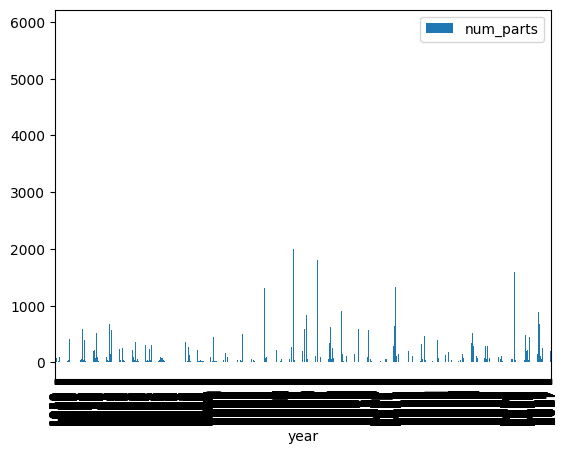

In [16]:
sets_plot = sets_df_sorted_years.plot.bar(
    x = 'year',
    y = 'num_parts'
)

In [17]:
min(sets_df['year'])

1950

In [18]:
max(sets_df['year'])

2017

**The plot is not really readable because we have a lot of entries. Let's bin them to make it more easy to read.**
**The years go from 1950 to 2017, let's say we'll bin by 10 years slices.**

In [19]:
year_bins = [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020] 
year_bins_names = ['1950-1960', '1960-1970', '1970-1980', '1980-1990', '1990-2000','2000-2010','2011 and after']
sets_df['year_binned'] = pd.cut(sets_df['year'], year_bins, labels = year_bins_names, include_lowest = True)
grouped_set = sets_df.groupby('year_binned', as_index=False)['num_parts'].mean()
grouped_set

,year_binned,num_parts
0,1950-1960,36.422222
1,1960-1970,69.410334
2,1970-1980,116.400641
3,1980-1990,108.266082
4,1990-2000,134.670927
5,2000-2010,180.303784
6,2011 and after,198.395783


<Axes: xlabel='Years', ylabel='Number of parts in set'>

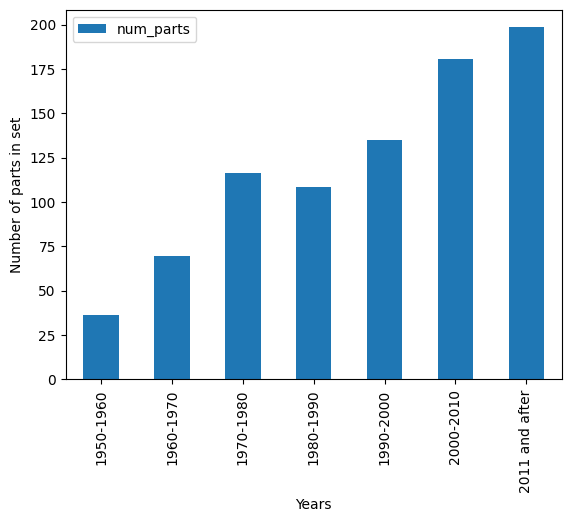

In [20]:
grouped_set.plot.bar(
    x = 'year_binned',
    y = 'num_parts',
    xlabel = 'Years',
    ylabel = 'Number of parts in set')

**Now that we know that the number of lego in a set increased over the years.**

**We could wonder why in the 80's, there was a small drop in the number of parts.**

**Is that because of financial matters ? Or maybe the lego sets started to have more specific / big pieces that were more expensive to manufacture, thus leading to the need to put less parts in the set to maintain the prices ?**

### Themes exploration

**We can try to explore the number of existing lego sets, and thus try to explore how much we have of different well known licences like Disney or Star Wars**

In [103]:
themes_number = sets_df['theme_id'].nunique()
print('There is', themes_number, 'existing sets')

There is 585 existing sets


In [125]:
sets_df['disney_set'] = sets_df['name'].str.contains('Disney', case = False)
disney_sets_number = sets_df['disney_set'].value_counts().loc[True]
print(disney_sets_number, 'of them are on Disney theme')

6 of them are on Disney theme


In [126]:
sets_df['star_wars_sets'] = sets_df['name'].str.contains('Star wars', case = False)
star_wars_sets_number = sets_df['star_wars_sets'].value_counts().loc[True]
print(star_wars_sets_number, 'of them are on Star Wars theme')

201 of them are on Star Wars theme


In [127]:
sets_df['harry_potter_sets'] = sets_df['name'].str.contains('Harry Potter', case = False)
harry_potter_sets_number = sets_df['harry_potter_sets'].value_counts().loc[True]
print(harry_potter_sets_number, 'of them are on Harry Potter theme')

11 of them are on Harry Potter theme


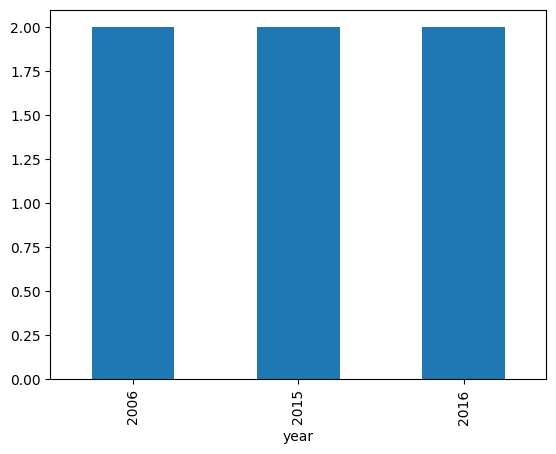

In [143]:
disney_sets_years = sets_df[sets_df.disney_set == True]['year'].value_counts().sort_index()
disney_plot = disney_sets_years.plot.bar()

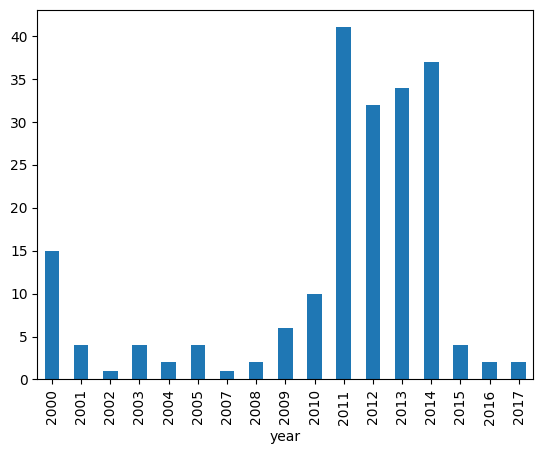

In [144]:
star_wars_sets_years = sets_df[sets_df.star_wars_sets == True]['year'].value_counts().sort_index()
star_wars_plot = star_wars_sets_years.plot.bar()

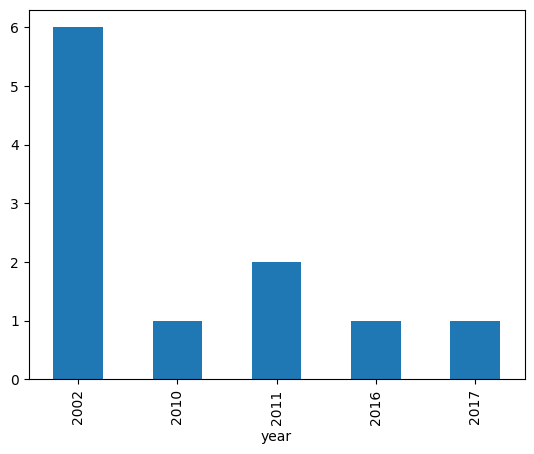

In [145]:
harry_potter_sets_years = sets_df[sets_df.harry_potter_sets == True]['year'].value_counts().sort_index()
harry_potter_plot = harry_potter_sets_years.plot.bar()

**It seems that disney was not really often represented in lego sets, but the number of different sets are equally distributed in time. On another hand, it seems that Harry Potter sets have a big peak in 2002, which seems logical as first Harry Potter film came out in 2001 (and the second one in 2002), so the licence starting to be well known in 2002 made sense for Lego to start creating sets on this licence.**

**On the side of Star Wars, no film seems to match the peaks in Lego sets creation, so maybe it refers to a trend that happened between 2011-2014 around Star Wars.**